In [4]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy



DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/96/84cf406fe7d589f3dba9fc0f737e65985a3526c6d8c783f02d4b5a10825d/numpy-1.16.6-cp27-cp27m-macosx_10_9_x86_64.whl
  Found existing installation: python-dateutil 1.5
    Uninstalling python-dateutil-1.5:
ERROR: Could not install packages due to an EnvironmentError: [('/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/dateutil/parser.pyc', '/private/var/folders/4y/tsmkn7wd01g4j3kr35spnr400000gn/T/pip-uninstall-bX1GII/parser.pyc', "[Errno 1] Operation not permitted: '/private/var/folders/4y/tsmkn7wd01g4j3kr35spnr400000gn/T/pip-uninstall-bX

  Using cached https://files.pythonhosted.org/packages/09/96/84cf406fe7d589f3dba9fc0f737e65985a3526c6d8c783f02d4b5a10825d/numpy-1.16.6-cp27-cp27m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/7a/3de1700fb471a6f56353446b4b962a7e4a5baaf24e5e4dec2d91d5f500da/scipy-1.2.3-cp27-cp27m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/c1/1a48a4bb9b515480d6c666977eeca9243be9fa9e6fb5a34be0ad9627f737/backports.functools_lru_cache-1.6.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/f3/7cdeeef9cb05c42fadcc8aa040dd3b80d94e0f6a8dedc4bacebf796c2385/subprocess32-3.5.4-cp27-cp27m-macosx_10_6_intel.whl
  Using cached https://files.pythonhosted.org/packages/0d/15/ec5f70ac7

In [5]:
# import what we just installed

import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

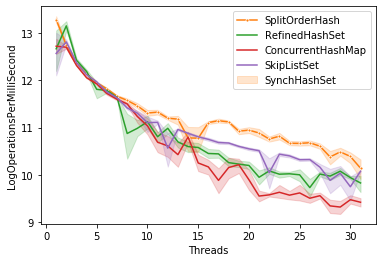

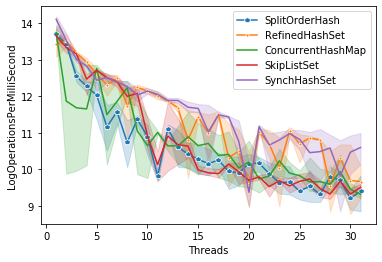

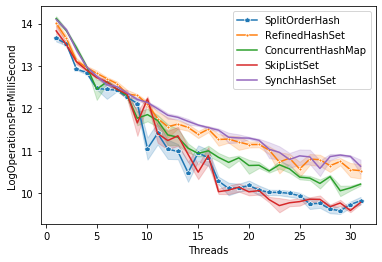

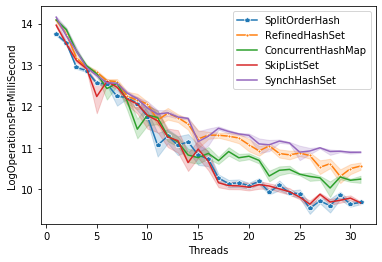

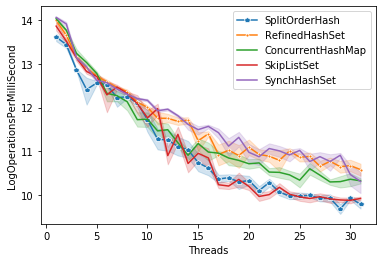

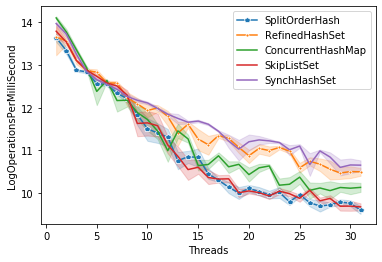

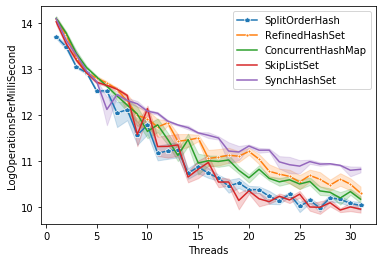

In [7]:
import seaborn as sns
csv_names = ['csvs/33C-33A-33R.csv',
             'csvs/20C-40A-40R.csv', 
             'csvs/10C-45A-45R.csv', 
             'csvs/2C-49A-49R.csv', 
             'csvs/40C-40A-20R.csv', 
             'csvs/20C-60A-20R.csv', 
             'csvs/10C-80A-10R.csv']


for csv_name in csv_names:
    df = pd.read_csv(csv_name)
    df16 = df[df['Name'] == 'splitOrderHash_MaxLoad_8']
    df16r = df[df['Name'] == 'Refinable16']
    df1c = df[df['Name'] == 'concHashMap']
    df1cs = df[df['Name'] == 'concSkipListSet']
    df1sh = df[df['Name'] == 'syncHashSet']

    dataframes = [df16, df16r, df1c, df1cs, df1sh] 
    #create new dataframes so that all ops/per columns averaged per each Thread. Less jagged lines. 
    # do this type conversion and should be all set
    for df in dataframes:
        df['Threads'] = df['Threads'].astype(float)
        df['OperationsPerMilliSecond'] = df['OperationsPerMilliSecond'].astype(float)
        df['LogOperationsPerMilliSecond'] = df['LogOperationsPerMilliSecond'].astype(float)
        
    
    palette = sns.color_palette('tab10', 5)

    fig, axs = plt.subplots(ncols=1)
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='p',data=df16,ax=axs, ci=99.5 , color=palette[0])


    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='.',data=df16r,ax=axs, ci=99.5 , color=palette[1])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1c,ax=axs, ci=99.5 , color=palette[2])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1cs,ax=axs, ci=99.5 , color=palette[3])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1sh,ax=axs, ci=99.5 , color=palette[4])


    #plt.title(csv_name[0:-4])


    #axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    #axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
    axs.legend(['SplitOrderHash', 'RefinedHashSet', 'ConcurrentHashMap', 'SkipListSet', 'SynchHashSet'], loc=1)
    plt.savefig('figs/' + csv_name[5:-4] + '.png')

    
